## Problem 1 (LDA)

In [11]:
import scipy.io
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm 

### (a), (b)

In [12]:
y1 = np.array([[-0.4, 0.58, 0.089], [-0.31, 0.27, -0.04], [0.38, 0.055, -0.035], [-0.15, 0.53, 0.011], [-0.35, 0.47, 0.034],
               [0.17, 0.69, 0.1], [-0.011, 0.55, -0.18], [-0.27, 0.61, 0.12], [-0.065, 0.49, 0.0012], [-0.12, 0.054, -0.063]])
y2 = np.array([[0.83, 1.6, -0.014], [1.1, 1.6, 0.48], [-0.44, -0.41, 0.32], [0.047, -0.45, 1.4], [0.28, 0.35, 3.1],
               [-0.39, -0.48, 0.11], [0.34, -0.079, 0.14], [-0.3, -0.22, 2.2], [1.1, 1.2, -0.46], [0.18, -0.11, -0.49]])

y1_m = np.array([np.mean(y1, 0)])
y1_std = (y1-y1_m).T
y1_within = y1_std.dot(y1_std.T)

y2_m = np.array([np.mean(y2, 0)])
y2_std = (y2-y2_m).T
y2_within = y2_std.dot(y2_std.T)

sw = (y1_within + y2_within)/10
v = np.linalg.inv(sw).dot((y1_m-y2_m).T)
print("v= \n", v)
a = np.linspace(y2.min(), y2.max(), 100)
x = v[0]*a
y = v[1]*a
z = v[2]*a

v= 
 [[-3.83246075]
 [ 2.1374852 ]
 [-0.76736865]]


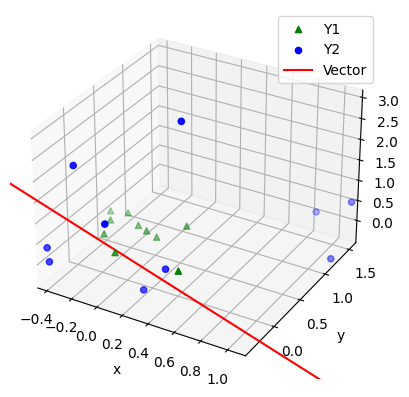

In [13]:
plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(y1[:, 0], y1[:, 1], y1[:, 2], c='g', marker='^', label = 'Y1')
ax.scatter(y2[:, 0], y2[:, 1], y2[:, 2], c='b', marker='o', label = 'Y2')
ax.plot(x, y, z, label = 'Vector', c = 'r')
ax.set_xlim(y2[:, 0].min(), y2[:, 0].max());ax.set_xlabel('x')
ax.set_ylim(y2[:, 1].min(), y2[:, 1].max());ax.set_ylabel('y')
ax.set_zlim(y2[:, 2].min(), y2[:, 2].max());ax.set_zlabel('z')
ax.legend()
plt.show()

### (c)

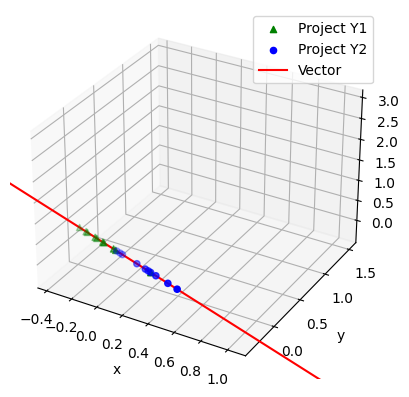

In [14]:
v_2norm = np.linalg.norm(v)**2
pro_y1 = y1.dot(v)/v_2norm*v.T
pro_y2 = y2.dot(v)/v_2norm*v.T

plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(pro_y1[:, 0], pro_y1[:, 1], pro_y1[:, 2], c='g', marker='^', label = 'Project Y1')
ax.scatter(pro_y2[:, 0], pro_y2[:, 1], pro_y2[:, 2], c='b', marker='o', label = 'Project Y2')
ax.plot(x, y, z, label = 'Vector', c = 'r')
ax.set_xlim(y2[:, 0].min(), y2[:, 0].max());ax.set_xlabel('x')
ax.set_ylim(y2[:, 1].min(), y2[:, 1].max());ax.set_ylabel('y')
ax.set_zlim(y2[:, 2].min(), y2[:, 2].max());ax.set_zlabel('z')
ax.legend()
plt.show()

### (d)

Decision boundary =  0.010469182325657203


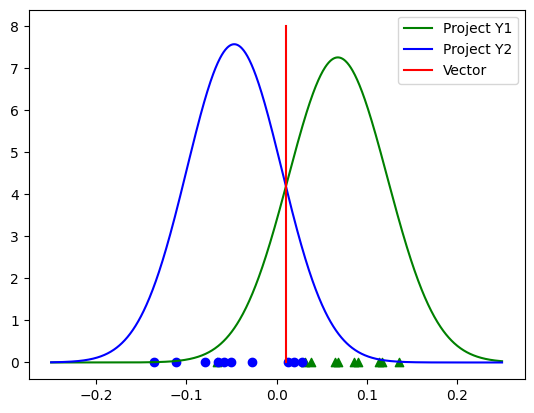

In [15]:
scalar_y1 = y1.dot(v)/v_2norm
scalar_y2 = y2.dot(v)/v_2norm
mu1, std1 = norm.fit(scalar_y1)
mu2, std2 = norm.fit(scalar_y2)
lin = np.linspace(-0.25,0.25,1000)
y1_gua = norm.pdf(lin, mu1, std1)
y2_gua = norm.pdf(lin, mu2, std2)


mu = (np.mean(scalar_y1) + np.mean(scalar_y2))/2
print('Decision boundary = ', mu)

plt.figure()
plt.scatter(scalar_y1, np.zeros(10), c='g', marker='^')
plt.scatter(scalar_y2, np.zeros(10), c='b', marker='o')
plt.plot(lin, y1_gua, 'g', label = 'Project Y1')
plt.plot(lin, y2_gua, 'b', label = 'Project Y2')
plt.plot(np.ones(10)*mu, np.linspace(0,8,10), 'r', label = 'Vector')
plt.legend()
plt.show()


### (e)

In [16]:
mis = 0
for i in range(len(scalar_y1)):
    if scalar_y1[i] < mu:
            mis += 1
    if scalar_y2[i] > mu:
            mis += 1
error = mis/20
print('Training error = ', error)

Training error =  0.2


## Problem 2 (PCA and LDA) 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### (a)
#### (1) List the principal components explaining 95%

In [18]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
names = iris.target_names

scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)

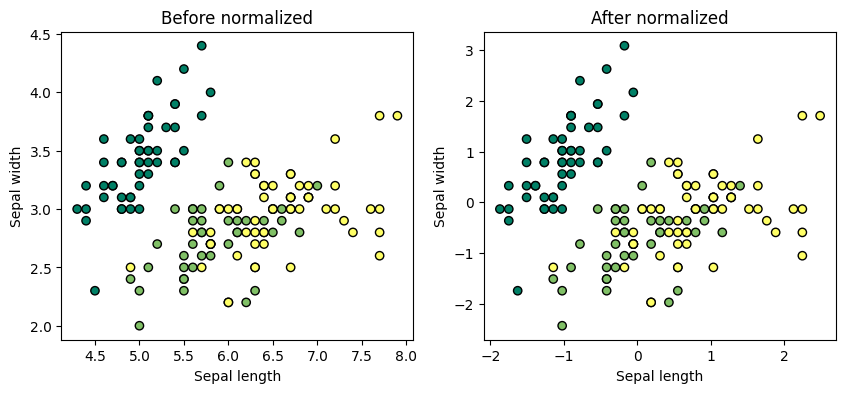

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="summer", edgecolor="k")
# plt.legend(labels=iris.target_names[0:])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title('Before normalized')

plt.subplot(1,2,2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Y, cmap="summer", edgecolor="k")
# plt.legend(labels=iris.target_names[0:])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title('After normalized')

plt.show()

透過座標刻度值，可以看到經過normalized後，資料分布趨勢更加集中

In [20]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
explained_variance = []

sum = 0
for i in pca.explained_variance_ratio_:
    sum += i
    explained_variance.append(sum)
print(explained_variance)

[0.7296244541329985, 0.9581320720000164, 0.9948212908928451, 0.9999999999999999]


前兩個特徵即可以占了大於95%以上的比例
#### (b) Plot  the  data  points

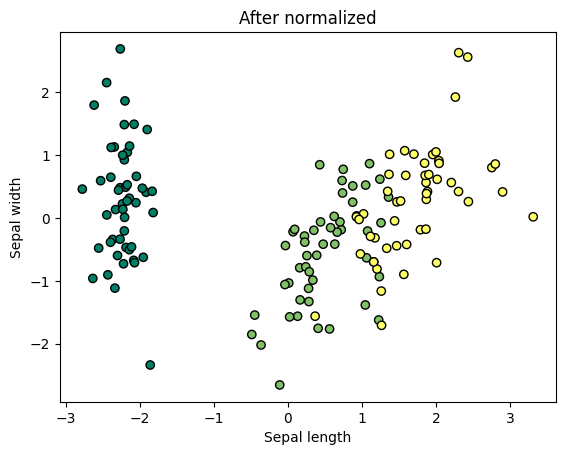

In [21]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap="summer", edgecolor="k", label=["aa", "bb", "cc"])
# plt.legend(labels=iris.target_names[0:])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title('After normalized')

plt.show()

可以發現圖中資料分布情況更為分開了

### (b) Split the Iris data

In [22]:
# setosa: 0~49, versicolor: 50~99, virginica: 100~149

x_train1 = X_scaled[0:30, :]
x_train2 = X_scaled[50:80, :]
x_train3 = X_scaled[100:130, :]
y_train1 = Y[0:30]
y_train2 = Y[50:80]
y_train3 = Y[100:130]

x_test1 = X_scaled[30:50, :]
x_test2 = X_scaled[80:100, :]
x_test3 = X_scaled[130:150, :]
y_test1 = Y[30:50]
y_test2 = Y[80:100]
y_test3 = Y[130:150]

x_train = np.concatenate((x_train1, x_train2, x_train3), axis=0)
y_train = np.concatenate((y_train1, y_train2, y_train3), axis=0)
x_test = np.concatenate((x_test1, x_test2, x_test3), axis=0)
y_test = np.concatenate((y_test1, y_test2, y_test3), axis=0)

In [23]:
LDA = LinearDiscriminantAnalysis(n_components=2).fit(x_train, y_train)
# LDA = LDA.fit(x_train, y_train)
X_LDA = LDA.transform(x_train)
y_train_pred = LDA.predict(x_train)
y_test_pred = LDA.predict(x_test)

print("train error: ", 1 - (LDA.score(x_train, y_train_pred)))
print("test error: ", 1 - (LDA.score(x_test, y_test_pred)))

train error:  0.0
test error:  0.0


##### (1) Perform LDA

In [32]:
LDA = LinearDiscriminantAnalysis(n_components=2)
X_LDA = LDA.fit_transform(x_train, y_train)
y_train_pred = LDA.predict(x_train)
y_test_pred = LDA.predict(x_test)

print("sklearn score")
print("train error: ", 1 - (LDA.score(x_train, y_train_pred)))
print("test error: ", 1 - (LDA.score(x_test, y_test_pred)))
print("-"*20)
print('manual calculate')
print(f"train diff: f{y_train - y_train_pred}")
print(f"test diff: {y_test - y_test_pred}")

sklearn score
train error:  0.0
test error:  0.0
--------------------
manual calculate
train diff: f[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
test diff: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]


這邊計算的train / test error皆為0，理論上應不會那麼理想，但具體原因還未知

但透過ground truth與LDA預測的結果相減比較，可趴線其實還是有非零的值，表示並沒有完美的預測，可能表示sklearn score計算方式並非我們所想

In [25]:
# # LDA 畫 train data 圖

# plot_decision_regions(x_train, y_train, clf=LDA)
# plt.xlabel('LD 1')
# plt.ylabel('LD 2')
# plt.legend(loc='lower left')
# # plt.tight_layout()

# plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


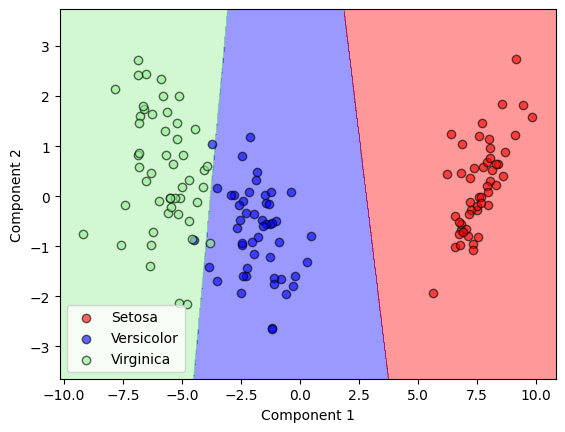

In [26]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'o', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    cla = ('Setosa', 'Versicolor', 'Virginica')
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], label = cla[idx])
    plt.legend()
    plt.xlabel('Component 1');plt.ylabel('Component 2')

LDA = LinearDiscriminantAnalysis(n_components=2)
X_LDA = LDA.fit_transform(X_scaled, Y)
lr = LogisticRegression()
lr = lr.fit(X_LDA, Y)

plot_decision_regions(X_LDA, Y, classifier=lr)

#### (2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


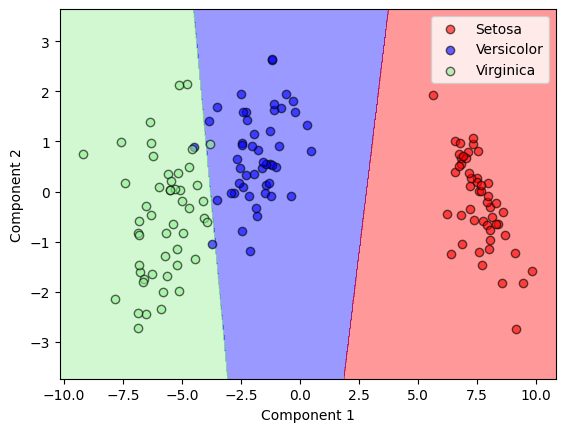

In [27]:
LDA = LinearDiscriminantAnalysis(n_components=2)
X_LDA = LDA.fit_transform(X_pca, Y)
lr = LogisticRegression()
lr = lr.fit(X_LDA, Y)

plot_decision_regions(X_LDA, Y, classifier=lr)

In [33]:
# # To getter a better understanding of interaction of the dimensions
# # plot the first three PCA dimensions
# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# X_reduced = PCA(n_components=3).fit_transform(iris.data)
# ax.scatter(
#     X_reduced[:, 0],
#     X_reduced[:, 1],
#     X_reduced[:, 2],
#     c=y,
#     cmap=plt.cm.Set1,
#     edgecolor="k",
#     s=40,
# )

# ax.set_title("First three PCA directions")
# ax.set_xlabel("1st eigenvector")
# # ax.w_xaxis.set_ticklabels([])
# ax.set_ylabel("2nd eigenvector")
# # ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# # ax.w_zaxis.set_ticklabels([])

# plt.show()

#### (3) compare
在這個case中，test/ traning的誤差皆相當相近，甚至是有一樣的狀況發生，但是其所繪製的結果卻不相同，或許是因為在Iris dataset上，利用PCA+LDA或許並沒有太大的效果，並且計算速度上也沒有提升或是降低太多